In [ ]:
import pandas as pd
from datetime import datetime
import json
import matplotlib.pyplot as plt


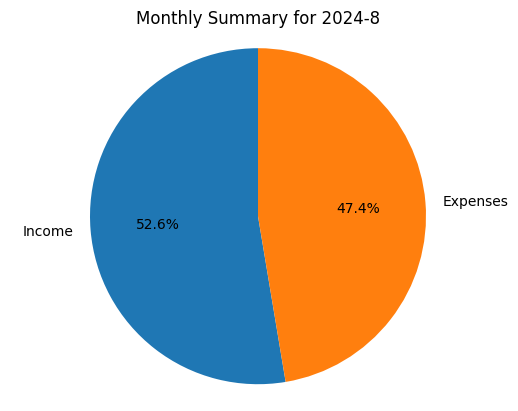

{'income': 10000.0, 'expenses': 9000.0, 'net': 1000.0}


FloatText(value=0.0, description='Amount:')

Dropdown(description='Type:', options=('income', 'expense'), value='income')

DatePicker(value=None, description='Date:')

Text(value='', description='Description:')

Button(description='Add Transaction', style=ButtonStyle())

FloatText(value=0.0, description='Amount:')

Dropdown(description='Type:', options=('income', 'expense'), value='income')

DatePicker(value=None, description='Date:')

Text(value='', description='Source:')

Text(value='', description='Recipient:')

Text(value='', description='Description:')

Button(description='Add Online Transaction', style=ButtonStyle())

IntText(value=2024, description='Year:')

IntText(value=8, description='Month:')

Button(description='Generate Report', style=ButtonStyle())

In [5]:
import pandas as pd
from datetime import datetime
import json
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

class User:
    def __init__(self, username, password):
        self.username = username
        self.password = password
        self.transactions = []
        self.online_transactions = []

    def add_transaction(self, amount, transaction_type, date, description=""):
        self.transactions.append(Transaction(amount, transaction_type, date, description))

    def add_online_transaction(self, amount, transaction_type, date, source, recipient, description=""):
        self.online_transactions.append(OnlineTransaction(amount, transaction_type, date, source, recipient, description))

    def get_monthly_summary(self, year, month):
        monthly_transactions = [t for t in self.transactions if t.date.year == year and t.date.month == month]
        monthly_online_transactions = [ot for ot in self.online_transactions if ot.date.year == year and ot.date.month == month]

        income = sum(t.amount for t in monthly_transactions if t.type == 'income')
        expenses = sum(t.amount for t in monthly_transactions if t.type == 'expense')

        online_income = sum(ot.amount for ot in monthly_online_transactions if ot.type == 'income')
        online_expenses = sum(ot.amount for ot in monthly_online_transactions if ot.type == 'expense')

        total_income = income + online_income
        total_expenses = expenses + online_expenses

        return {'income': total_income, 'expenses': total_expenses, 'net': total_income - total_expenses}

    def save_to_file(self, filename):
        data = {
            'username': self.username,
            'password': self.password,
            'transactions': [t.to_dict() for t in self.transactions],
            'online_transactions': [ot.to_dict() for ot in self.online_transactions]
        }
        with open(filename, 'w') as file:
            json.dump(data, file)

    @staticmethod
    def load_from_file(filename):
        with open(filename, 'r') as file:
            data = json.load(file)
        user = User(data['username'], data['password'])
        user.transactions = [Transaction.from_dict(t) for t in data['transactions']]
        user.online_transactions = [OnlineTransaction.from_dict(ot) for ot in data['online_transactions']]
        return user

class Transaction:
    def __init__(self, amount, transaction_type, date, description=""):
        self.amount = amount
        self.type = transaction_type  # 'income' or 'expense'
        self.date = datetime.strptime(date, "%Y-%m-%d") if isinstance(date, str) else date
        self.description = description

    def to_dict(self):
        return {
            'amount': self.amount,
            'type': self.type,
            'date': self.date.strftime("%Y-%m-%d"),
            'description': self.description
        }

    @staticmethod
    def from_dict(data):
        return Transaction(
            amount=data['amount'],
            transaction_type=data['type'],
            date=datetime.strptime(data['date'], "%Y-%m-%d"),
            description=data['description']
        )

class OnlineTransaction:
    def __init__(self, amount, transaction_type, date, source, recipient, description=""):
        self.amount = amount
        self.type = transaction_type  # 'income' or 'expense'
        self.date = datetime.strptime(date, "%Y-%m-%d") if isinstance(date, str) else date
        self.source = source
        self.recipient = recipient
        self.description = description

    def to_dict(self):
        return {
            'amount': self.amount,
            'type': self.type,
            'date': self.date.strftime("%Y-%m-%d"),
            'source': self.source,
            'recipient': self.recipient,
            'description': self.description
        }

    @staticmethod
    def from_dict(data):
        return OnlineTransaction(
            amount=data['amount'],
            transaction_type=data['type'],
            date=datetime.strptime(data['date'], "%Y-%m-%d"),
            source=data['source'],
            recipient=data['recipient'],
            description=data['description']
        )

class Report:
    def __init__(self, user):
        self.user = user

    def generate_monthly_report(self, year, month):
        summary = self.user.get_monthly_summary(year, month)
        self._generate_graph(summary, year, month)
        return summary

    def _generate_graph(self, summary, year, month):
        labels = ['Income', 'Expenses']
        values = [summary['income'], summary['expenses']]

        fig, ax = plt.subplots()
        ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title(f'Monthly Summary for {year}-{month}')
        plt.show()

# インタラクティブUIの作成
user = User("John Doe", "password123")

def add_transaction_ui():
    amount = widgets.FloatText(description='Amount:')
    transaction_type = widgets.Dropdown(options=['income', 'expense'], description='Type:')
    date = widgets.DatePicker(description='Date:')
    description = widgets.Text(description='Description:')
    add_button = widgets.Button(description='Add Transaction')

    def on_add_button_clicked(b):
        user.add_transaction(amount.value, transaction_type.value, date.value.strftime('%Y-%m-%d'), description.value)
        amount.value = 0
        transaction_type.value = 'income'
        date.value = None
        description.value = ''
        print("Transaction added!")

    add_button.on_click(on_add_button_clicked)

    display(amount, transaction_type, date, description, add_button)

def add_online_transaction_ui():
    amount = widgets.FloatText(description='Amount:')
    transaction_type = widgets.Dropdown(options=['income', 'expense'], description='Type:')
    date = widgets.DatePicker(description='Date:')
    source = widgets.Text(description='Source:')
    recipient = widgets.Text(description='Recipient:')
    description = widgets.Text(description='Description:')
    add_button = widgets.Button(description='Add Online Transaction')

    def on_add_button_clicked(b):
        user.add_online_transaction(amount.value, transaction_type.value, date.value.strftime('%Y-%m-%d'), source.value, recipient.value, description.value)
        amount.value = 0
        transaction_type.value = 'income'
        date.value = None
        source.value = ''
        recipient.value = ''
        description.value = ''
        print("Online Transaction added!")

    add_button.on_click(on_add_button_clicked)

    display(amount, transaction_type, date, source, recipient, description, add_button)

def generate_report_ui():
    year = widgets.IntText(description='Year:', value=datetime.now().year)
    month = widgets.IntText(description='Month:', value=datetime.now().month)
    generate_button = widgets.Button(description='Generate Report')

    def on_generate_button_clicked(b):
        clear_output(wait=True)
        report = Report(user)
        summary = report.generate_monthly_report(year.value, month.value)
        print(summary)
        add_transaction_ui()
        add_online_transaction_ui()
        generate_report_ui()

    generate_button.on_click(on_generate_button_clicked)

    display(year, month, generate_button)

add_transaction_ui()
add_online_transaction_ui()
generate_report_ui()
